In [4]:
%conda info -e
#%pip install yfinance
%conda env export > requirements.yml


# conda environments:
#
base                     C:\ProgramData\Anaconda3
tensorflow1              C:\ProgramData\Anaconda3\envs\tensorflow1
wordcount                C:\ProgramData\Anaconda3\envs\wordcount
fortran                  C:\Users\salmasi\.conda\envs\fortran
tensorflow_1.15       *  C:\Users\salmasi\.conda\envs\tensorflow_1.15


Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import scipy as scp
from math import erf
import yfinance as yf
import collections
from pandas_datareader import data as pdr
import numpy as np
from sklearn.preprocessing import scale
from TFANN import ANNR
import pandas as pd

C:\Users\salmasi\.conda\envs\tensorflow_1.15\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
#aapl = yf.Ticker("aapl")
aapl = yf.Ticker("ibm")

#print(aapl)
print(aapl.info)
aapl.history(period="max")

{'zip': '10504', 'sector': 'Technology', 'fullTimeEmployees': 352600, 'longBusinessSummary': "International Business Machines Corporation operates as an integrated solutions and services company worldwide. Its Cloud & Cognitive Software segment offers software for vertical and domain-specific solutions in health, financial services, and Internet of Things (IoT) application areas; and customer information control system and storage, and analytics and integration software to support client mission critical on-premise workloads in banking, airline, and retail industries. It also offers middleware and data platform software, including Red Hat, which enables the operation of clients' hybrid multi-cloud environments; and Cloud Paks, WebSphere distributed, and analytics platform software, such as DB2 distributed, information integration, and enterprise content management, as well as IoT, Blockchain and AI/Watson platforms. The company's Global Business Services segment offers business consult

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,0.62,0.62,0.61,0.61,387200,0.0,0.0
1962-01-03,0.61,0.62,0.61,0.62,288000,0.0,0.0
1962-01-04,0.62,0.62,0.61,0.61,256000,0.0,0.0
1962-01-05,0.61,0.61,0.60,0.60,363200,0.0,0.0
1962-01-08,0.60,0.60,0.58,0.59,544000,0.0,0.0
...,...,...,...,...,...,...,...
2020-06-05,133.89,134.23,131.75,132.06,5892700,0.0,0.0
2020-06-08,132.27,135.88,132.27,135.75,5370500,0.0,0.0
2020-06-09,133.52,133.60,131.02,131.87,5393600,0.0,0.0


In [26]:
aapl.actions
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("AAPL", start="2010-01-01", end="2020-06-11")
#? data
d=data.to_dict()
print(d.keys())

[*********************100%***********************]  1 of 1 completed
dict_keys(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])


In [27]:
dd=d["Close"]

In [29]:
for key in dd.keys():
    new_key=(str(key).replace(' 00:00:00',''))
    dd[new_key] = dd.pop(key)
od= collections.OrderedDict(sorted(dd.items()))

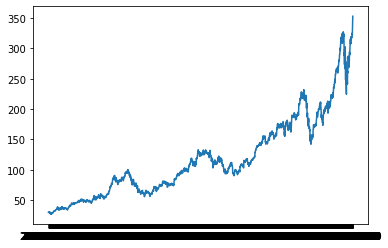

In [30]:
lists = sorted(dd.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()

In [9]:
#aapl.history(period="max")

In [10]:
#data = pd.read_csv('APLS.csv')
#data.sample(frac=2, replace=True)
adj_close_price=y
dates=x

In [11]:
adj_close_price=scale(adj_close_price)
#gets the price and dates from the matrix
#plt.plot(dates, adj_close_price)

In [12]:
date_idx=[]
for i,j in enumerate(dates):
         date_idx.append(int(i))

In [13]:
date_idx=np.array(date_idx[:],ndmin=2).T
adj_close_price=np.array(adj_close_price[:],ndmin=2).T
print(date_idx.shape)
print(adj_close_price.shape)

(2628, 1)
(2628, 1)


In [14]:
#Number of neurons in the input, output, and hidden layers
inp = 1
output = 1
hidden = 20
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'relu'), ('F', output)]
#construct the model and dictate params
mlpr = ANNR([inp], layers, batchSize = 100, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.










In [15]:
holdDays = 5
totalDays = len(date_idx)
mlpr.fit(date_idx[0:(totalDays-holdDays)], adj_close_price[0:(totalDays-holdDays)])

Iter     1	      6.68021047 (Batch Size:   100)
Iter     2	      5.48242629 (Batch Size:   100)
Iter     3	      4.78038205 (Batch Size:   100)
Iter     4	      3.93558960 (Batch Size:   100)
Iter     5	      3.42507610 (Batch Size:   100)
Iter     6	      2.90416458 (Batch Size:   100)
Iter     7	      2.44808570 (Batch Size:   100)
Iter     8	      2.04782187 (Batch Size:   100)
Iter     9	      1.89639286 (Batch Size:   100)
Iter    10	      1.85460719 (Batch Size:   100)
Iter    11	      1.68312059 (Batch Size:   100)
Iter    12	      1.54317635 (Batch Size:   100)
Iter    13	      1.54431582 (Batch Size:   100)
Iter    14	      1.42775860 (Batch Size:   100)
Iter    15	      1.38543588 (Batch Size:   100)
Iter    16	      1.27049173 (Batch Size:   100)
Iter    17	      1.17920296 (Batch Size:   100)
Iter    18	      1.24590985 (Batch Size:   100)
Iter    19	      1.14196325 (Batch Size:   100)
Iter    20	      1.11438779 (Batch Size:   100)
Iter    21	      1.04614570 (Batch Size:

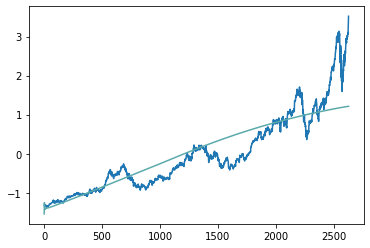

In [16]:
#Predict the stock price using the model
pricePredict = mlpr.predict(date_idx)
#Display the predicted reuslts agains the actual data
plt.plot(date_idx, adj_close_price)
plt.plot(date_idx, pricePredict, c='#5aa9ab')
plt.show()

In [17]:
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.01, reg = 1e-4, verbose = True)

In [18]:
holdDays = 5
totalDays = len(date_idx)
mlpr2.fit(date_idx[0:(totalDays-holdDays)], adj_close_price[0:(totalDays-holdDays)])
pricePredict2 = mlpr2.predict(date_idx)

Iter     1	      3.04254016 (Batch Size:   256)
Iter     2	      2.09432136 (Batch Size:   256)
Iter     3	      1.51747796 (Batch Size:   256)
Iter     4	      1.20375129 (Batch Size:   256)
Iter     5	      1.03545929 (Batch Size:   256)
Iter     6	      0.91251254 (Batch Size:   256)
Iter     7	      0.98118834 (Batch Size:   256)
Iter     8	      0.95628654 (Batch Size:   256)
Iter     9	      1.02091792 (Batch Size:   256)
Iter    10	      1.00914057 (Batch Size:   256)
Iter    11	      0.99202198 (Batch Size:   256)
Iter    12	      0.96275778 (Batch Size:   256)
Iter    13	      0.93813684 (Batch Size:   256)
Iter    14	      0.93870054 (Batch Size:   256)
Iter    15	      0.96614733 (Batch Size:   256)
Iter    16	      0.93295672 (Batch Size:   256)
Iter    17	      0.91497869 (Batch Size:   256)
Iter    18	      0.88168643 (Batch Size:   256)
Iter    19	      0.90674957 (Batch Size:   256)
Iter    20	      0.87950947 (Batch Size:   256)
Iter    21	      0.89578678 (Batch Size:

Iter   174	      0.16620515 (Batch Size:   256)
Iter   175	      0.17954468 (Batch Size:   256)
Iter   176	      0.15288583 (Batch Size:   256)
Iter   177	      0.14420837 (Batch Size:   256)
Iter   178	      0.16317042 (Batch Size:   256)
Iter   179	      0.15374880 (Batch Size:   256)
Iter   180	      0.15766254 (Batch Size:   256)
Iter   181	      0.15467076 (Batch Size:   256)
Iter   182	      0.15471730 (Batch Size:   256)
Iter   183	      0.15812038 (Batch Size:   256)
Iter   184	      0.15484155 (Batch Size:   256)
Iter   185	      0.15926024 (Batch Size:   256)
Iter   186	      0.14811193 (Batch Size:   256)
Iter   187	      0.13291346 (Batch Size:   256)
Iter   188	      0.15448746 (Batch Size:   256)
Iter   189	      0.14191797 (Batch Size:   256)
Iter   190	      0.15056444 (Batch Size:   256)
Iter   191	      0.16911620 (Batch Size:   256)
Iter   192	      0.15115909 (Batch Size:   256)
Iter   193	      0.15315656 (Batch Size:   256)
Iter   194	      0.14693656 (Batch Size:

Iter   354	      0.12850043 (Batch Size:   256)
Iter   355	      0.11643305 (Batch Size:   256)
Iter   356	      0.11861697 (Batch Size:   256)
Iter   357	      0.11395554 (Batch Size:   256)
Iter   358	      0.10652874 (Batch Size:   256)
Iter   359	      0.10621765 (Batch Size:   256)
Iter   360	      0.11668574 (Batch Size:   256)
Iter   361	      0.11939906 (Batch Size:   256)
Iter   362	      0.11375309 (Batch Size:   256)
Iter   363	      0.10937353 (Batch Size:   256)
Iter   364	      0.12496762 (Batch Size:   256)
Iter   365	      0.10617991 (Batch Size:   256)
Iter   366	      0.09975686 (Batch Size:   256)
Iter   367	      0.10397713 (Batch Size:   256)
Iter   368	      0.11213068 (Batch Size:   256)
Iter   369	      0.10647379 (Batch Size:   256)
Iter   370	      0.10804071 (Batch Size:   256)
Iter   371	      0.12693456 (Batch Size:   256)
Iter   372	      0.11864066 (Batch Size:   256)
Iter   373	      0.11311671 (Batch Size:   256)
Iter   374	      0.11236029 (Batch Size:

Iter   526	      0.09142849 (Batch Size:   256)
Iter   527	      0.08868912 (Batch Size:   256)
Iter   528	      0.09063483 (Batch Size:   256)
Iter   529	      0.08800135 (Batch Size:   256)
Iter   530	      0.09169139 (Batch Size:   256)
Iter   531	      0.09645886 (Batch Size:   256)
Iter   532	      0.09720489 (Batch Size:   256)
Iter   533	      0.08673389 (Batch Size:   256)
Iter   534	      0.08148563 (Batch Size:   256)
Iter   535	      0.08617891 (Batch Size:   256)
Iter   536	      0.08401859 (Batch Size:   256)
Iter   537	      0.08774957 (Batch Size:   256)
Iter   538	      0.09351012 (Batch Size:   256)
Iter   539	      0.10454535 (Batch Size:   256)
Iter   540	      0.08602627 (Batch Size:   256)
Iter   541	      0.08961625 (Batch Size:   256)
Iter   542	      0.08297731 (Batch Size:   256)
Iter   543	      0.09080136 (Batch Size:   256)
Iter   544	      0.08114738 (Batch Size:   256)
Iter   545	      0.08617920 (Batch Size:   256)
Iter   546	      0.08206220 (Batch Size:

Iter   697	      0.08421525 (Batch Size:   256)
Iter   698	      0.08363358 (Batch Size:   256)
Iter   699	      0.09805651 (Batch Size:   256)
Iter   700	      0.09084921 (Batch Size:   256)
Iter   701	      0.08076558 (Batch Size:   256)
Iter   702	      0.08234279 (Batch Size:   256)
Iter   703	      0.07823835 (Batch Size:   256)
Iter   704	      0.08010047 (Batch Size:   256)
Iter   705	      0.08053422 (Batch Size:   256)
Iter   706	      0.07775509 (Batch Size:   256)
Iter   707	      0.08691829 (Batch Size:   256)
Iter   708	      0.08457691 (Batch Size:   256)
Iter   709	      0.08089945 (Batch Size:   256)
Iter   710	      0.08184306 (Batch Size:   256)
Iter   711	      0.08654026 (Batch Size:   256)
Iter   712	      0.08005181 (Batch Size:   256)
Iter   713	      0.08341247 (Batch Size:   256)
Iter   714	      0.07693913 (Batch Size:   256)
Iter   715	      0.07650303 (Batch Size:   256)
Iter   716	      0.09092095 (Batch Size:   256)
Iter   717	      0.08643090 (Batch Size:

Iter  1045	      0.09291644 (Batch Size:   256)
Iter  1046	      0.07968092 (Batch Size:   256)
Iter  1047	      0.07832298 (Batch Size:   256)
Iter  1048	      0.08063628 (Batch Size:   256)
Iter  1049	      0.08044437 (Batch Size:   256)
Iter  1050	      0.07699899 (Batch Size:   256)
Iter  1051	      0.08054407 (Batch Size:   256)
Iter  1052	      0.07767867 (Batch Size:   256)
Iter  1053	      0.08497413 (Batch Size:   256)
Iter  1054	      0.07750669 (Batch Size:   256)
Iter  1055	      0.07422857 (Batch Size:   256)
Iter  1056	      0.07635802 (Batch Size:   256)
Iter  1057	      0.08455969 (Batch Size:   256)
Iter  1058	      0.08405535 (Batch Size:   256)
Iter  1059	      0.07799485 (Batch Size:   256)
Iter  1060	      0.08055531 (Batch Size:   256)
Iter  1061	      0.08436121 (Batch Size:   256)
Iter  1062	      0.08435211 (Batch Size:   256)
Iter  1063	      0.08283354 (Batch Size:   256)
Iter  1064	      0.08557051 (Batch Size:   256)
Iter  1065	      0.09428370 (Batch Size:

Iter  1221	      0.08625588 (Batch Size:   256)
Iter  1222	      0.07781258 (Batch Size:   256)
Iter  1223	      0.07538870 (Batch Size:   256)
Iter  1224	      0.08049893 (Batch Size:   256)
Iter  1225	      0.07508799 (Batch Size:   256)
Iter  1226	      0.07448226 (Batch Size:   256)
Iter  1227	      0.07885168 (Batch Size:   256)
Iter  1228	      0.07528822 (Batch Size:   256)
Iter  1229	      0.08318307 (Batch Size:   256)
Iter  1230	      0.07816062 (Batch Size:   256)
Iter  1231	      0.08148557 (Batch Size:   256)
Iter  1232	      0.08149430 (Batch Size:   256)
Iter  1233	      0.09973284 (Batch Size:   256)
Iter  1234	      0.08653962 (Batch Size:   256)
Iter  1235	      0.07979477 (Batch Size:   256)
Iter  1236	      0.08113046 (Batch Size:   256)
Iter  1237	      0.08004187 (Batch Size:   256)
Iter  1238	      0.07778495 (Batch Size:   256)
Iter  1239	      0.08193120 (Batch Size:   256)
Iter  1240	      0.09014381 (Batch Size:   256)
Iter  1241	      0.08129523 (Batch Size:

Iter  1400	      0.08076897 (Batch Size:   256)
Iter  1401	      0.08213725 (Batch Size:   256)
Iter  1402	      0.08003857 (Batch Size:   256)
Iter  1403	      0.07843180 (Batch Size:   256)
Iter  1404	      0.07873596 (Batch Size:   256)
Iter  1405	      0.07769563 (Batch Size:   256)
Iter  1406	      0.08239830 (Batch Size:   256)
Iter  1407	      0.07826207 (Batch Size:   256)
Iter  1408	      0.08596969 (Batch Size:   256)
Iter  1409	      0.07944470 (Batch Size:   256)
Iter  1410	      0.08205538 (Batch Size:   256)
Iter  1411	      0.07958603 (Batch Size:   256)
Iter  1412	      0.07787730 (Batch Size:   256)
Iter  1413	      0.07835350 (Batch Size:   256)
Iter  1414	      0.07422516 (Batch Size:   256)
Iter  1415	      0.08128321 (Batch Size:   256)
Iter  1416	      0.07932715 (Batch Size:   256)
Iter  1417	      0.07523119 (Batch Size:   256)
Iter  1418	      0.07582162 (Batch Size:   256)
Iter  1419	      0.07759673 (Batch Size:   256)
Iter  1420	      0.07900648 (Batch Size:

Iter  1577	      0.07644174 (Batch Size:   256)
Iter  1578	      0.07820731 (Batch Size:   256)
Iter  1579	      0.07784433 (Batch Size:   256)
Iter  1580	      0.07605897 (Batch Size:   256)
Iter  1581	      0.07831433 (Batch Size:   256)
Iter  1582	      0.09019738 (Batch Size:   256)
Iter  1583	      0.08885149 (Batch Size:   256)
Iter  1584	      0.08105812 (Batch Size:   256)
Iter  1585	      0.08677912 (Batch Size:   256)
Iter  1586	      0.08898528 (Batch Size:   256)
Iter  1587	      0.08714956 (Batch Size:   256)
Iter  1588	      0.07940127 (Batch Size:   256)
Iter  1589	      0.07705269 (Batch Size:   256)
Iter  1590	      0.07400758 (Batch Size:   256)
Iter  1591	      0.07348225 (Batch Size:   256)
Iter  1592	      0.07729544 (Batch Size:   256)
Iter  1593	      0.08649972 (Batch Size:   256)
Iter  1594	      0.07936211 (Batch Size:   256)
Iter  1595	      0.08368318 (Batch Size:   256)
Iter  1596	      0.07511752 (Batch Size:   256)
Iter  1597	      0.07827661 (Batch Size:

Iter  1757	      0.07752128 (Batch Size:   256)
Iter  1758	      0.07748663 (Batch Size:   256)
Iter  1759	      0.07845378 (Batch Size:   256)
Iter  1760	      0.07836926 (Batch Size:   256)
Iter  1761	      0.07984948 (Batch Size:   256)
Iter  1762	      0.07859466 (Batch Size:   256)
Iter  1763	      0.07582770 (Batch Size:   256)
Iter  1764	      0.07290682 (Batch Size:   256)
Iter  1765	      0.07624952 (Batch Size:   256)
Iter  1766	      0.07429768 (Batch Size:   256)
Iter  1767	      0.08269957 (Batch Size:   256)
Iter  1768	      0.09486961 (Batch Size:   256)
Iter  1769	      0.09081642 (Batch Size:   256)
Iter  1770	      0.07952086 (Batch Size:   256)
Iter  1771	      0.08061423 (Batch Size:   256)
Iter  1772	      0.08285589 (Batch Size:   256)
Iter  1773	      0.07963414 (Batch Size:   256)
Iter  1774	      0.08563254 (Batch Size:   256)
Iter  1775	      0.08604405 (Batch Size:   256)
Iter  1776	      0.07950246 (Batch Size:   256)
Iter  1777	      0.08212638 (Batch Size:

Iter  1935	      0.07133104 (Batch Size:   256)
Iter  1936	      0.07326183 (Batch Size:   256)
Iter  1937	      0.07926244 (Batch Size:   256)
Iter  1938	      0.08159225 (Batch Size:   256)
Iter  1939	      0.08502055 (Batch Size:   256)
Iter  1940	      0.08198669 (Batch Size:   256)
Iter  1941	      0.08630819 (Batch Size:   256)
Iter  1942	      0.08474478 (Batch Size:   256)
Iter  1943	      0.07796303 (Batch Size:   256)
Iter  1944	      0.07573117 (Batch Size:   256)
Iter  1945	      0.07811293 (Batch Size:   256)
Iter  1946	      0.07979549 (Batch Size:   256)
Iter  1947	      0.08263793 (Batch Size:   256)
Iter  1948	      0.07578470 (Batch Size:   256)
Iter  1949	      0.07371088 (Batch Size:   256)
Iter  1950	      0.07156331 (Batch Size:   256)
Iter  1951	      0.07494016 (Batch Size:   256)
Iter  1952	      0.07060444 (Batch Size:   256)
Iter  1953	      0.07437318 (Batch Size:   256)
Iter  1954	      0.07409621 (Batch Size:   256)
Iter  1955	      0.07546865 (Batch Size:

Iter  2278	      0.07870563 (Batch Size:   256)
Iter  2279	      0.07493391 (Batch Size:   256)
Iter  2280	      0.08385671 (Batch Size:   256)
Iter  2281	      0.08392916 (Batch Size:   256)
Iter  2282	      0.09069422 (Batch Size:   256)
Iter  2283	      0.08199408 (Batch Size:   256)
Iter  2284	      0.08022100 (Batch Size:   256)
Iter  2285	      0.07666224 (Batch Size:   256)
Iter  2286	      0.07397445 (Batch Size:   256)
Iter  2287	      0.07162093 (Batch Size:   256)
Iter  2288	      0.07461140 (Batch Size:   256)
Iter  2289	      0.07577452 (Batch Size:   256)
Iter  2290	      0.07923457 (Batch Size:   256)
Iter  2291	      0.07943180 (Batch Size:   256)
Iter  2292	      0.08486814 (Batch Size:   256)
Iter  2293	      0.07808845 (Batch Size:   256)
Iter  2294	      0.07461732 (Batch Size:   256)
Iter  2295	      0.07099426 (Batch Size:   256)
Iter  2296	      0.07219796 (Batch Size:   256)
Iter  2297	      0.07548737 (Batch Size:   256)
Iter  2298	      0.07929511 (Batch Size:

Iter  2449	      0.08238454 (Batch Size:   256)
Iter  2450	      0.08486556 (Batch Size:   256)
Iter  2451	      0.07754394 (Batch Size:   256)
Iter  2452	      0.06905483 (Batch Size:   256)
Iter  2453	      0.07546359 (Batch Size:   256)
Iter  2454	      0.07605949 (Batch Size:   256)
Iter  2455	      0.07464437 (Batch Size:   256)
Iter  2456	      0.07594628 (Batch Size:   256)
Iter  2457	      0.07650587 (Batch Size:   256)
Iter  2458	      0.08318308 (Batch Size:   256)
Iter  2459	      0.07243601 (Batch Size:   256)
Iter  2460	      0.07852574 (Batch Size:   256)
Iter  2461	      0.07581578 (Batch Size:   256)
Iter  2462	      0.07147246 (Batch Size:   256)
Iter  2463	      0.07897812 (Batch Size:   256)
Iter  2464	      0.08688730 (Batch Size:   256)
Iter  2465	      0.07631369 (Batch Size:   256)
Iter  2466	      0.09041559 (Batch Size:   256)
Iter  2467	      0.08674658 (Batch Size:   256)
Iter  2468	      0.08371854 (Batch Size:   256)
Iter  2469	      0.07734415 (Batch Size:

Iter  2621	      0.07674395 (Batch Size:   256)
Iter  2622	      0.08540952 (Batch Size:   256)
Iter  2623	      0.08269529 (Batch Size:   256)
Iter  2624	      0.07821067 (Batch Size:   256)
Iter  2625	      0.07832917 (Batch Size:   256)
Iter  2626	      0.07837875 (Batch Size:   256)
Iter  2627	      0.08398989 (Batch Size:   256)
Iter  2628	      0.07662717 (Batch Size:   256)
Iter  2629	      0.07987723 (Batch Size:   256)
Iter  2630	      0.07324256 (Batch Size:   256)
Iter  2631	      0.07020361 (Batch Size:   256)
Iter  2632	      0.07158211 (Batch Size:   256)
Iter  2633	      0.07657484 (Batch Size:   256)
Iter  2634	      0.07779440 (Batch Size:   256)
Iter  2635	      0.07981217 (Batch Size:   256)
Iter  2636	      0.08564386 (Batch Size:   256)
Iter  2637	      0.08094440 (Batch Size:   256)
Iter  2638	      0.07598657 (Batch Size:   256)
Iter  2639	      0.06877910 (Batch Size:   256)
Iter  2640	      0.07065888 (Batch Size:   256)
Iter  2641	      0.07340035 (Batch Size:

Iter  2792	      0.07571301 (Batch Size:   256)
Iter  2793	      0.08291412 (Batch Size:   256)
Iter  2794	      0.08195218 (Batch Size:   256)
Iter  2795	      0.07586155 (Batch Size:   256)
Iter  2796	      0.09150798 (Batch Size:   256)
Iter  2797	      0.07451962 (Batch Size:   256)
Iter  2798	      0.07548979 (Batch Size:   256)
Iter  2799	      0.07608415 (Batch Size:   256)
Iter  2800	      0.07918350 (Batch Size:   256)
Iter  2801	      0.08679322 (Batch Size:   256)
Iter  2802	      0.07601017 (Batch Size:   256)
Iter  2803	      0.08363394 (Batch Size:   256)
Iter  2804	      0.09532841 (Batch Size:   256)
Iter  2805	      0.09469336 (Batch Size:   256)
Iter  2806	      0.07579478 (Batch Size:   256)
Iter  2807	      0.07609934 (Batch Size:   256)
Iter  2808	      0.07807058 (Batch Size:   256)
Iter  2809	      0.07693202 (Batch Size:   256)
Iter  2810	      0.07265379 (Batch Size:   256)
Iter  2811	      0.07361858 (Batch Size:   256)
Iter  2812	      0.07307219 (Batch Size:

Iter  2972	      0.07160482 (Batch Size:   256)
Iter  2973	      0.07114242 (Batch Size:   256)
Iter  2974	      0.07446144 (Batch Size:   256)
Iter  2975	      0.07243856 (Batch Size:   256)
Iter  2976	      0.07215254 (Batch Size:   256)
Iter  2977	      0.07557582 (Batch Size:   256)
Iter  2978	      0.07131432 (Batch Size:   256)
Iter  2979	      0.07250034 (Batch Size:   256)
Iter  2980	      0.07440154 (Batch Size:   256)
Iter  2981	      0.07167374 (Batch Size:   256)
Iter  2982	      0.07167851 (Batch Size:   256)
Iter  2983	      0.07002727 (Batch Size:   256)
Iter  2984	      0.07239092 (Batch Size:   256)
Iter  2985	      0.07165081 (Batch Size:   256)
Iter  2986	      0.07602050 (Batch Size:   256)
Iter  2987	      0.07820780 (Batch Size:   256)
Iter  2988	      0.08040994 (Batch Size:   256)
Iter  2989	      0.08694874 (Batch Size:   256)
Iter  2990	      0.08661264 (Batch Size:   256)
Iter  2991	      0.07460181 (Batch Size:   256)
Iter  2992	      0.07326441 (Batch Size:

Iter  3158	      0.07036738 (Batch Size:   256)
Iter  3159	      0.07327728 (Batch Size:   256)
Iter  3160	      0.07321365 (Batch Size:   256)
Iter  3161	      0.07754290 (Batch Size:   256)
Iter  3162	      0.07448053 (Batch Size:   256)
Iter  3163	      0.07290963 (Batch Size:   256)
Iter  3164	      0.07359364 (Batch Size:   256)
Iter  3165	      0.07300287 (Batch Size:   256)
Iter  3166	      0.08190607 (Batch Size:   256)
Iter  3167	      0.07949501 (Batch Size:   256)
Iter  3168	      0.07233733 (Batch Size:   256)
Iter  3169	      0.07237609 (Batch Size:   256)
Iter  3170	      0.07617396 (Batch Size:   256)
Iter  3171	      0.07788594 (Batch Size:   256)
Iter  3172	      0.07741073 (Batch Size:   256)
Iter  3173	      0.07712488 (Batch Size:   256)
Iter  3174	      0.07777516 (Batch Size:   256)
Iter  3175	      0.07475201 (Batch Size:   256)
Iter  3176	      0.07717358 (Batch Size:   256)
Iter  3177	      0.07141580 (Batch Size:   256)
Iter  3178	      0.07404855 (Batch Size:

Iter  3330	      0.07390640 (Batch Size:   256)
Iter  3331	      0.07685423 (Batch Size:   256)
Iter  3332	      0.07356135 (Batch Size:   256)
Iter  3333	      0.07526701 (Batch Size:   256)
Iter  3334	      0.07670652 (Batch Size:   256)
Iter  3335	      0.08359840 (Batch Size:   256)
Iter  3336	      0.07799490 (Batch Size:   256)
Iter  3337	      0.07523482 (Batch Size:   256)
Iter  3338	      0.08448526 (Batch Size:   256)
Iter  3339	      0.07902160 (Batch Size:   256)
Iter  3340	      0.08255370 (Batch Size:   256)
Iter  3341	      0.07421286 (Batch Size:   256)
Iter  3342	      0.08240249 (Batch Size:   256)
Iter  3343	      0.07669607 (Batch Size:   256)
Iter  3344	      0.07312134 (Batch Size:   256)
Iter  3345	      0.07659434 (Batch Size:   256)
Iter  3346	      0.07166639 (Batch Size:   256)
Iter  3347	      0.07828205 (Batch Size:   256)
Iter  3348	      0.07339468 (Batch Size:   256)
Iter  3349	      0.07012438 (Batch Size:   256)
Iter  3350	      0.07611163 (Batch Size:

Iter  3507	      0.07532245 (Batch Size:   256)
Iter  3508	      0.08118967 (Batch Size:   256)
Iter  3509	      0.08427555 (Batch Size:   256)
Iter  3510	      0.08681539 (Batch Size:   256)
Iter  3511	      0.09431199 (Batch Size:   256)
Iter  3512	      0.07914315 (Batch Size:   256)
Iter  3513	      0.07951015 (Batch Size:   256)
Iter  3514	      0.07147743 (Batch Size:   256)
Iter  3515	      0.07395189 (Batch Size:   256)
Iter  3516	      0.07650451 (Batch Size:   256)
Iter  3517	      0.07474308 (Batch Size:   256)
Iter  3518	      0.07662664 (Batch Size:   256)
Iter  3519	      0.08679070 (Batch Size:   256)
Iter  3520	      0.08264618 (Batch Size:   256)
Iter  3521	      0.07672553 (Batch Size:   256)
Iter  3522	      0.07067242 (Batch Size:   256)
Iter  3523	      0.07278647 (Batch Size:   256)
Iter  3524	      0.07359740 (Batch Size:   256)
Iter  3525	      0.07331082 (Batch Size:   256)
Iter  3526	      0.07318367 (Batch Size:   256)
Iter  3527	      0.07004887 (Batch Size:

Iter  3690	      0.07113831 (Batch Size:   256)
Iter  3691	      0.07193005 (Batch Size:   256)
Iter  3692	      0.07149306 (Batch Size:   256)
Iter  3693	      0.07594465 (Batch Size:   256)
Iter  3694	      0.07430999 (Batch Size:   256)
Iter  3695	      0.07238169 (Batch Size:   256)
Iter  3696	      0.07150602 (Batch Size:   256)
Iter  3697	      0.07392697 (Batch Size:   256)
Iter  3698	      0.07672946 (Batch Size:   256)
Iter  3699	      0.07050417 (Batch Size:   256)
Iter  3700	      0.07505448 (Batch Size:   256)
Iter  3701	      0.07706410 (Batch Size:   256)
Iter  3702	      0.07351113 (Batch Size:   256)
Iter  3703	      0.07161364 (Batch Size:   256)
Iter  3704	      0.07338993 (Batch Size:   256)
Iter  3705	      0.07758774 (Batch Size:   256)
Iter  3706	      0.07514446 (Batch Size:   256)
Iter  3707	      0.08096082 (Batch Size:   256)
Iter  3708	      0.07932965 (Batch Size:   256)
Iter  3709	      0.07049294 (Batch Size:   256)
Iter  3710	      0.07122788 (Batch Size:

Iter  4043	      0.07924922 (Batch Size:   256)
Iter  4044	      0.08301394 (Batch Size:   256)
Iter  4045	      0.08264643 (Batch Size:   256)
Iter  4046	      0.08020310 (Batch Size:   256)
Iter  4047	      0.07028419 (Batch Size:   256)
Iter  4048	      0.07424308 (Batch Size:   256)
Iter  4049	      0.07436504 (Batch Size:   256)
Iter  4050	      0.09328922 (Batch Size:   256)
Iter  4051	      0.07889866 (Batch Size:   256)
Iter  4052	      0.06914119 (Batch Size:   256)
Iter  4053	      0.06872905 (Batch Size:   256)
Iter  4054	      0.06966664 (Batch Size:   256)
Iter  4055	      0.07085377 (Batch Size:   256)
Iter  4056	      0.07524922 (Batch Size:   256)
Iter  4057	      0.07292655 (Batch Size:   256)
Iter  4058	      0.08053465 (Batch Size:   256)
Iter  4059	      0.07882031 (Batch Size:   256)
Iter  4060	      0.07540587 (Batch Size:   256)
Iter  4061	      0.08098475 (Batch Size:   256)
Iter  4062	      0.06910985 (Batch Size:   256)
Iter  4063	      0.07310285 (Batch Size:

Iter  4219	      0.08428994 (Batch Size:   256)
Iter  4220	      0.07648851 (Batch Size:   256)
Iter  4221	      0.07014422 (Batch Size:   256)
Iter  4222	      0.07011634 (Batch Size:   256)
Iter  4223	      0.07375301 (Batch Size:   256)
Iter  4224	      0.07357258 (Batch Size:   256)
Iter  4225	      0.07357153 (Batch Size:   256)
Iter  4226	      0.07802045 (Batch Size:   256)
Iter  4227	      0.07508572 (Batch Size:   256)
Iter  4228	      0.08151499 (Batch Size:   256)
Iter  4229	      0.07275837 (Batch Size:   256)
Iter  4230	      0.07067082 (Batch Size:   256)
Iter  4231	      0.07493086 (Batch Size:   256)
Iter  4232	      0.07231478 (Batch Size:   256)
Iter  4233	      0.07225064 (Batch Size:   256)
Iter  4234	      0.07078947 (Batch Size:   256)
Iter  4235	      0.07618429 (Batch Size:   256)
Iter  4236	      0.07080960 (Batch Size:   256)
Iter  4237	      0.07369639 (Batch Size:   256)
Iter  4238	      0.07393731 (Batch Size:   256)
Iter  4239	      0.07482019 (Batch Size:

Iter  4398	      0.08295559 (Batch Size:   256)
Iter  4399	      0.07966838 (Batch Size:   256)
Iter  4400	      0.07735587 (Batch Size:   256)
Iter  4401	      0.07749862 (Batch Size:   256)
Iter  4402	      0.07254850 (Batch Size:   256)
Iter  4403	      0.08119056 (Batch Size:   256)
Iter  4404	      0.07686115 (Batch Size:   256)
Iter  4405	      0.07702523 (Batch Size:   256)
Iter  4406	      0.07284418 (Batch Size:   256)
Iter  4407	      0.07385542 (Batch Size:   256)
Iter  4408	      0.07009726 (Batch Size:   256)
Iter  4409	      0.07199204 (Batch Size:   256)
Iter  4410	      0.07143988 (Batch Size:   256)
Iter  4411	      0.07016891 (Batch Size:   256)
Iter  4412	      0.07193424 (Batch Size:   256)
Iter  4413	      0.08206661 (Batch Size:   256)
Iter  4414	      0.07456185 (Batch Size:   256)
Iter  4415	      0.07329644 (Batch Size:   256)
Iter  4416	      0.07154599 (Batch Size:   256)
Iter  4417	      0.07109600 (Batch Size:   256)
Iter  4418	      0.08534290 (Batch Size:

Iter  4746	      0.07097287 (Batch Size:   256)
Iter  4747	      0.08113406 (Batch Size:   256)
Iter  4748	      0.07758539 (Batch Size:   256)
Iter  4749	      0.07471157 (Batch Size:   256)
Iter  4750	      0.07575056 (Batch Size:   256)
Iter  4751	      0.06933455 (Batch Size:   256)
Iter  4752	      0.07016563 (Batch Size:   256)
Iter  4753	      0.07721084 (Batch Size:   256)
Iter  4754	      0.07392719 (Batch Size:   256)
Iter  4755	      0.07368222 (Batch Size:   256)
Iter  4756	      0.09294734 (Batch Size:   256)
Iter  4757	      0.10053267 (Batch Size:   256)
Iter  4758	      0.07906299 (Batch Size:   256)
Iter  4759	      0.07421452 (Batch Size:   256)
Iter  4760	      0.07512768 (Batch Size:   256)
Iter  4761	      0.07282620 (Batch Size:   256)
Iter  4762	      0.07110608 (Batch Size:   256)
Iter  4763	      0.07608494 (Batch Size:   256)
Iter  4764	      0.06695079 (Batch Size:   256)
Iter  4765	      0.06633610 (Batch Size:   256)
Iter  4766	      0.07484544 (Batch Size:

Iter  4925	      0.07051321 (Batch Size:   256)
Iter  4926	      0.07445053 (Batch Size:   256)
Iter  4927	      0.07115162 (Batch Size:   256)
Iter  4928	      0.06809511 (Batch Size:   256)
Iter  4929	      0.06922222 (Batch Size:   256)
Iter  4930	      0.07491161 (Batch Size:   256)
Iter  4931	      0.07977576 (Batch Size:   256)
Iter  4932	      0.08026946 (Batch Size:   256)
Iter  4933	      0.07321388 (Batch Size:   256)
Iter  4934	      0.06930592 (Batch Size:   256)
Iter  4935	      0.07153649 (Batch Size:   256)
Iter  4936	      0.07047474 (Batch Size:   256)
Iter  4937	      0.07048507 (Batch Size:   256)
Iter  4938	      0.07337167 (Batch Size:   256)
Iter  4939	      0.07274055 (Batch Size:   256)
Iter  4940	      0.07170474 (Batch Size:   256)
Iter  4941	      0.07621649 (Batch Size:   256)
Iter  4942	      0.08617731 (Batch Size:   256)
Iter  4943	      0.07596806 (Batch Size:   256)
Iter  4944	      0.06930705 (Batch Size:   256)
Iter  4945	      0.06946624 (Batch Size:

Iter  5097	      0.07028521 (Batch Size:   256)
Iter  5098	      0.07291363 (Batch Size:   256)
Iter  5099	      0.07006815 (Batch Size:   256)
Iter  5100	      0.07115798 (Batch Size:   256)
Iter  5101	      0.07188345 (Batch Size:   256)
Iter  5102	      0.07288848 (Batch Size:   256)
Iter  5103	      0.07144488 (Batch Size:   256)
Iter  5104	      0.07301102 (Batch Size:   256)
Iter  5105	      0.06928144 (Batch Size:   256)
Iter  5106	      0.06630871 (Batch Size:   256)
Iter  5107	      0.07266876 (Batch Size:   256)
Iter  5108	      0.07082543 (Batch Size:   256)
Iter  5109	      0.07116314 (Batch Size:   256)
Iter  5110	      0.07724189 (Batch Size:   256)
Iter  5111	      0.06617470 (Batch Size:   256)
Iter  5112	      0.07195733 (Batch Size:   256)
Iter  5113	      0.07908314 (Batch Size:   256)
Iter  5114	      0.07283789 (Batch Size:   256)
Iter  5115	      0.07025829 (Batch Size:   256)
Iter  5116	      0.07005381 (Batch Size:   256)
Iter  5117	      0.09046956 (Batch Size:

Iter  5279	      0.07229178 (Batch Size:   256)
Iter  5280	      0.07640052 (Batch Size:   256)
Iter  5281	      0.07994634 (Batch Size:   256)
Iter  5282	      0.07765341 (Batch Size:   256)
Iter  5283	      0.07302931 (Batch Size:   256)
Iter  5284	      0.06842929 (Batch Size:   256)
Iter  5285	      0.07151525 (Batch Size:   256)
Iter  5286	      0.07243304 (Batch Size:   256)
Iter  5287	      0.06834430 (Batch Size:   256)
Iter  5288	      0.06918960 (Batch Size:   256)
Iter  5289	      0.07210161 (Batch Size:   256)
Iter  5290	      0.06924233 (Batch Size:   256)
Iter  5291	      0.07424805 (Batch Size:   256)
Iter  5292	      0.07193375 (Batch Size:   256)
Iter  5293	      0.06875211 (Batch Size:   256)
Iter  5294	      0.06999725 (Batch Size:   256)
Iter  5295	      0.07106759 (Batch Size:   256)
Iter  5296	      0.06960108 (Batch Size:   256)
Iter  5297	      0.06673615 (Batch Size:   256)
Iter  5298	      0.07036122 (Batch Size:   256)
Iter  5299	      0.07035256 (Batch Size:

Iter  5457	      0.07027474 (Batch Size:   256)
Iter  5458	      0.06961963 (Batch Size:   256)
Iter  5459	      0.07061304 (Batch Size:   256)
Iter  5460	      0.06785399 (Batch Size:   256)
Iter  5461	      0.07078534 (Batch Size:   256)
Iter  5462	      0.07059416 (Batch Size:   256)
Iter  5463	      0.07516487 (Batch Size:   256)
Iter  5464	      0.07422609 (Batch Size:   256)
Iter  5465	      0.07087480 (Batch Size:   256)
Iter  5466	      0.06837988 (Batch Size:   256)
Iter  5467	      0.07234778 (Batch Size:   256)
Iter  5468	      0.06975866 (Batch Size:   256)
Iter  5469	      0.07226870 (Batch Size:   256)
Iter  5470	      0.07299049 (Batch Size:   256)
Iter  5471	      0.07556538 (Batch Size:   256)
Iter  5472	      0.07155090 (Batch Size:   256)
Iter  5473	      0.06917295 (Batch Size:   256)
Iter  5474	      0.07376685 (Batch Size:   256)
Iter  5475	      0.07794683 (Batch Size:   256)
Iter  5476	      0.07191635 (Batch Size:   256)
Iter  5477	      0.06916918 (Batch Size:

Iter  5633	      0.07092436 (Batch Size:   256)
Iter  5634	      0.07555843 (Batch Size:   256)
Iter  5635	      0.07514948 (Batch Size:   256)
Iter  5636	      0.07304570 (Batch Size:   256)
Iter  5637	      0.06936254 (Batch Size:   256)
Iter  5638	      0.07727553 (Batch Size:   256)
Iter  5639	      0.07523496 (Batch Size:   256)
Iter  5640	      0.06922158 (Batch Size:   256)
Iter  5641	      0.06628367 (Batch Size:   256)
Iter  5642	      0.06685085 (Batch Size:   256)
Iter  5643	      0.07274778 (Batch Size:   256)
Iter  5644	      0.07037526 (Batch Size:   256)
Iter  5645	      0.06757220 (Batch Size:   256)
Iter  5646	      0.06421404 (Batch Size:   256)
Iter  5647	      0.07002743 (Batch Size:   256)
Iter  5648	      0.06881983 (Batch Size:   256)
Iter  5649	      0.06814453 (Batch Size:   256)
Iter  5650	      0.06813579 (Batch Size:   256)
Iter  5651	      0.07206558 (Batch Size:   256)
Iter  5652	      0.06656504 (Batch Size:   256)
Iter  5653	      0.07125134 (Batch Size:

Iter  5804	      0.07354609 (Batch Size:   256)
Iter  5805	      0.07097864 (Batch Size:   256)
Iter  5806	      0.07010882 (Batch Size:   256)
Iter  5807	      0.07427562 (Batch Size:   256)
Iter  5808	      0.06892633 (Batch Size:   256)
Iter  5809	      0.06742851 (Batch Size:   256)
Iter  5810	      0.06988523 (Batch Size:   256)
Iter  5811	      0.07259949 (Batch Size:   256)
Iter  5812	      0.06606884 (Batch Size:   256)
Iter  5813	      0.06838092 (Batch Size:   256)
Iter  5814	      0.06627509 (Batch Size:   256)
Iter  5815	      0.06861476 (Batch Size:   256)
Iter  5816	      0.06490867 (Batch Size:   256)
Iter  5817	      0.06809437 (Batch Size:   256)
Iter  5818	      0.06897850 (Batch Size:   256)
Iter  5819	      0.06864695 (Batch Size:   256)
Iter  5820	      0.07603986 (Batch Size:   256)
Iter  5821	      0.07378682 (Batch Size:   256)
Iter  5822	      0.06773130 (Batch Size:   256)
Iter  5823	      0.07255499 (Batch Size:   256)
Iter  5824	      0.08143160 (Batch Size:

Iter  5986	      0.07011705 (Batch Size:   256)
Iter  5987	      0.07559165 (Batch Size:   256)
Iter  5988	      0.08005925 (Batch Size:   256)
Iter  5989	      0.08110553 (Batch Size:   256)
Iter  5990	      0.07457796 (Batch Size:   256)
Iter  5991	      0.06948074 (Batch Size:   256)
Iter  5992	      0.07033519 (Batch Size:   256)
Iter  5993	      0.07538978 (Batch Size:   256)
Iter  5994	      0.08003375 (Batch Size:   256)
Iter  5995	      0.08131725 (Batch Size:   256)
Iter  5996	      0.07836374 (Batch Size:   256)
Iter  5997	      0.07074567 (Batch Size:   256)
Iter  5998	      0.06641812 (Batch Size:   256)
Iter  5999	      0.07070811 (Batch Size:   256)
Iter  6000	      0.06459372 (Batch Size:   256)
Iter  6001	      0.06915650 (Batch Size:   256)
Iter  6002	      0.06489957 (Batch Size:   256)
Iter  6003	      0.06818037 (Batch Size:   256)
Iter  6004	      0.06571713 (Batch Size:   256)
Iter  6005	      0.07287575 (Batch Size:   256)
Iter  6006	      0.06415328 (Batch Size:

Iter  6157	      0.06775044 (Batch Size:   256)
Iter  6158	      0.07331506 (Batch Size:   256)
Iter  6159	      0.07857081 (Batch Size:   256)
Iter  6160	      0.07514408 (Batch Size:   256)
Iter  6161	      0.09549862 (Batch Size:   256)
Iter  6162	      0.08280169 (Batch Size:   256)
Iter  6163	      0.07007338 (Batch Size:   256)
Iter  6164	      0.06778319 (Batch Size:   256)
Iter  6165	      0.07093164 (Batch Size:   256)
Iter  6166	      0.06903335 (Batch Size:   256)
Iter  6167	      0.06755781 (Batch Size:   256)
Iter  6168	      0.06918127 (Batch Size:   256)
Iter  6169	      0.06817509 (Batch Size:   256)
Iter  6170	      0.06700369 (Batch Size:   256)
Iter  6171	      0.07400283 (Batch Size:   256)
Iter  6172	      0.06887233 (Batch Size:   256)
Iter  6173	      0.07513618 (Batch Size:   256)
Iter  6174	      0.06919476 (Batch Size:   256)
Iter  6175	      0.06867675 (Batch Size:   256)
Iter  6176	      0.07057258 (Batch Size:   256)
Iter  6177	      0.06904794 (Batch Size:

Iter  6343	      0.07447799 (Batch Size:   256)
Iter  6344	      0.06958656 (Batch Size:   256)
Iter  6345	      0.06456459 (Batch Size:   256)
Iter  6346	      0.06737409 (Batch Size:   256)
Iter  6347	      0.06742323 (Batch Size:   256)
Iter  6348	      0.06583963 (Batch Size:   256)
Iter  6349	      0.07034380 (Batch Size:   256)
Iter  6350	      0.06617774 (Batch Size:   256)
Iter  6351	      0.06703860 (Batch Size:   256)
Iter  6352	      0.07153498 (Batch Size:   256)
Iter  6353	      0.06398610 (Batch Size:   256)
Iter  6354	      0.06733537 (Batch Size:   256)
Iter  6355	      0.06651771 (Batch Size:   256)
Iter  6356	      0.06206574 (Batch Size:   256)
Iter  6357	      0.06427274 (Batch Size:   256)
Iter  6358	      0.06544505 (Batch Size:   256)
Iter  6359	      0.07232808 (Batch Size:   256)
Iter  6360	      0.06605537 (Batch Size:   256)
Iter  6361	      0.06817199 (Batch Size:   256)
Iter  6362	      0.06508122 (Batch Size:   256)
Iter  6363	      0.07039601 (Batch Size:

Iter  6530	      0.06592768 (Batch Size:   256)
Iter  6531	      0.06942381 (Batch Size:   256)
Iter  6532	      0.07153348 (Batch Size:   256)
Iter  6533	      0.06865389 (Batch Size:   256)
Iter  6534	      0.06871655 (Batch Size:   256)
Iter  6535	      0.06514817 (Batch Size:   256)
Iter  6536	      0.06725198 (Batch Size:   256)
Iter  6537	      0.06243509 (Batch Size:   256)
Iter  6538	      0.06537623 (Batch Size:   256)
Iter  6539	      0.07215786 (Batch Size:   256)
Iter  6540	      0.07537145 (Batch Size:   256)
Iter  6541	      0.06991403 (Batch Size:   256)
Iter  6542	      0.06362370 (Batch Size:   256)
Iter  6543	      0.06438795 (Batch Size:   256)
Iter  6544	      0.07099473 (Batch Size:   256)
Iter  6545	      0.06907886 (Batch Size:   256)
Iter  6546	      0.06436710 (Batch Size:   256)
Iter  6547	      0.06418626 (Batch Size:   256)
Iter  6548	      0.06366472 (Batch Size:   256)
Iter  6549	      0.06164771 (Batch Size:   256)
Iter  6550	      0.06765270 (Batch Size:

Iter  6708	      0.06391917 (Batch Size:   256)
Iter  6709	      0.06509631 (Batch Size:   256)
Iter  6710	      0.06745093 (Batch Size:   256)
Iter  6711	      0.06957701 (Batch Size:   256)
Iter  6712	      0.06599030 (Batch Size:   256)
Iter  6713	      0.06547407 (Batch Size:   256)
Iter  6714	      0.06345540 (Batch Size:   256)
Iter  6715	      0.06824456 (Batch Size:   256)
Iter  6716	      0.06470139 (Batch Size:   256)
Iter  6717	      0.06887011 (Batch Size:   256)
Iter  6718	      0.07722917 (Batch Size:   256)
Iter  6719	      0.06169382 (Batch Size:   256)
Iter  6720	      0.06480299 (Batch Size:   256)
Iter  6721	      0.06002406 (Batch Size:   256)
Iter  6722	      0.06486088 (Batch Size:   256)
Iter  6723	      0.06327237 (Batch Size:   256)
Iter  6724	      0.06243916 (Batch Size:   256)
Iter  6725	      0.06411870 (Batch Size:   256)
Iter  6726	      0.06180672 (Batch Size:   256)
Iter  6727	      0.06520758 (Batch Size:   256)
Iter  6728	      0.06879645 (Batch Size:

Iter  6883	      0.06241379 (Batch Size:   256)
Iter  6884	      0.06258021 (Batch Size:   256)
Iter  6885	      0.05767301 (Batch Size:   256)
Iter  6886	      0.06415861 (Batch Size:   256)
Iter  6887	      0.05827393 (Batch Size:   256)
Iter  6888	      0.06367785 (Batch Size:   256)
Iter  6889	      0.05934692 (Batch Size:   256)
Iter  6890	      0.06745161 (Batch Size:   256)
Iter  6891	      0.06050558 (Batch Size:   256)
Iter  6892	      0.07155135 (Batch Size:   256)
Iter  6893	      0.08489580 (Batch Size:   256)
Iter  6894	      0.06395759 (Batch Size:   256)
Iter  6895	      0.06341380 (Batch Size:   256)
Iter  6896	      0.06347734 (Batch Size:   256)
Iter  6897	      0.05890413 (Batch Size:   256)
Iter  6898	      0.06081051 (Batch Size:   256)
Iter  6899	      0.06001681 (Batch Size:   256)
Iter  6900	      0.06225691 (Batch Size:   256)
Iter  6901	      0.06355911 (Batch Size:   256)
Iter  6902	      0.06452867 (Batch Size:   256)
Iter  6903	      0.05840944 (Batch Size:

Iter  7070	      0.05782031 (Batch Size:   256)
Iter  7071	      0.06287863 (Batch Size:   256)
Iter  7072	      0.05824781 (Batch Size:   256)
Iter  7073	      0.05956877 (Batch Size:   256)
Iter  7074	      0.06089276 (Batch Size:   256)
Iter  7075	      0.06312717 (Batch Size:   256)
Iter  7076	      0.08211641 (Batch Size:   256)
Iter  7077	      0.07961382 (Batch Size:   256)
Iter  7078	      0.05752408 (Batch Size:   256)
Iter  7079	      0.05947677 (Batch Size:   256)
Iter  7080	      0.05810721 (Batch Size:   256)
Iter  7081	      0.06130201 (Batch Size:   256)
Iter  7082	      0.06195844 (Batch Size:   256)
Iter  7083	      0.05738486 (Batch Size:   256)
Iter  7084	      0.06420786 (Batch Size:   256)
Iter  7085	      0.06605565 (Batch Size:   256)
Iter  7086	      0.06417335 (Batch Size:   256)
Iter  7087	      0.05794241 (Batch Size:   256)
Iter  7088	      0.05922025 (Batch Size:   256)
Iter  7089	      0.05608119 (Batch Size:   256)
Iter  7090	      0.06181978 (Batch Size:

Iter  7242	      0.05936071 (Batch Size:   256)
Iter  7243	      0.05854666 (Batch Size:   256)
Iter  7244	      0.06104671 (Batch Size:   256)
Iter  7245	      0.06663646 (Batch Size:   256)
Iter  7246	      0.06505981 (Batch Size:   256)
Iter  7247	      0.06546924 (Batch Size:   256)
Iter  7248	      0.05921968 (Batch Size:   256)
Iter  7249	      0.06508108 (Batch Size:   256)
Iter  7250	      0.06135186 (Batch Size:   256)
Iter  7251	      0.05943471 (Batch Size:   256)
Iter  7252	      0.05662043 (Batch Size:   256)
Iter  7253	      0.06330609 (Batch Size:   256)
Iter  7254	      0.07422705 (Batch Size:   256)
Iter  7255	      0.07063397 (Batch Size:   256)
Iter  7256	      0.06494201 (Batch Size:   256)
Iter  7257	      0.05657253 (Batch Size:   256)
Iter  7258	      0.05638473 (Batch Size:   256)
Iter  7259	      0.05195972 (Batch Size:   256)
Iter  7260	      0.05845225 (Batch Size:   256)
Iter  7261	      0.05635185 (Batch Size:   256)
Iter  7262	      0.05813608 (Batch Size:

Iter  7416	      0.06341090 (Batch Size:   256)
Iter  7417	      0.05795928 (Batch Size:   256)
Iter  7418	      0.05512130 (Batch Size:   256)
Iter  7419	      0.05718961 (Batch Size:   256)
Iter  7420	      0.05769051 (Batch Size:   256)
Iter  7421	      0.05703658 (Batch Size:   256)
Iter  7422	      0.05622993 (Batch Size:   256)
Iter  7423	      0.05530467 (Batch Size:   256)
Iter  7424	      0.05344256 (Batch Size:   256)
Iter  7425	      0.05870854 (Batch Size:   256)
Iter  7426	      0.05714497 (Batch Size:   256)
Iter  7427	      0.06127799 (Batch Size:   256)
Iter  7428	      0.07251747 (Batch Size:   256)
Iter  7429	      0.06310248 (Batch Size:   256)
Iter  7430	      0.05806674 (Batch Size:   256)
Iter  7431	      0.05561566 (Batch Size:   256)
Iter  7432	      0.05570132 (Batch Size:   256)
Iter  7433	      0.05659204 (Batch Size:   256)
Iter  7434	      0.05660950 (Batch Size:   256)
Iter  7435	      0.05690080 (Batch Size:   256)
Iter  7436	      0.06342288 (Batch Size:

Iter  7590	      0.05631235 (Batch Size:   256)
Iter  7591	      0.05676424 (Batch Size:   256)
Iter  7592	      0.05759246 (Batch Size:   256)
Iter  7593	      0.05579347 (Batch Size:   256)
Iter  7594	      0.05974072 (Batch Size:   256)
Iter  7595	      0.06275507 (Batch Size:   256)
Iter  7596	      0.06129265 (Batch Size:   256)
Iter  7597	      0.05561752 (Batch Size:   256)
Iter  7598	      0.05592317 (Batch Size:   256)
Iter  7599	      0.06241517 (Batch Size:   256)
Iter  7600	      0.06107474 (Batch Size:   256)
Iter  7601	      0.06070663 (Batch Size:   256)
Iter  7602	      0.06289970 (Batch Size:   256)
Iter  7603	      0.05603646 (Batch Size:   256)
Iter  7604	      0.05475146 (Batch Size:   256)
Iter  7605	      0.05529929 (Batch Size:   256)
Iter  7606	      0.05360970 (Batch Size:   256)
Iter  7607	      0.06126343 (Batch Size:   256)
Iter  7608	      0.06489287 (Batch Size:   256)
Iter  7609	      0.06306390 (Batch Size:   256)
Iter  7610	      0.05670503 (Batch Size:

Iter  7762	      0.06454204 (Batch Size:   256)
Iter  7763	      0.06351463 (Batch Size:   256)
Iter  7764	      0.05532177 (Batch Size:   256)
Iter  7765	      0.05276609 (Batch Size:   256)
Iter  7766	      0.05450060 (Batch Size:   256)
Iter  7767	      0.05448100 (Batch Size:   256)
Iter  7768	      0.05785489 (Batch Size:   256)
Iter  7769	      0.05641129 (Batch Size:   256)
Iter  7770	      0.05591844 (Batch Size:   256)
Iter  7771	      0.05638421 (Batch Size:   256)
Iter  7772	      0.05337371 (Batch Size:   256)
Iter  7773	      0.05569490 (Batch Size:   256)
Iter  7774	      0.05475501 (Batch Size:   256)
Iter  7775	      0.05291375 (Batch Size:   256)
Iter  7776	      0.05740290 (Batch Size:   256)
Iter  7777	      0.05633936 (Batch Size:   256)
Iter  7778	      0.05131208 (Batch Size:   256)
Iter  7779	      0.06090172 (Batch Size:   256)
Iter  7780	      0.06608933 (Batch Size:   256)
Iter  7781	      0.05871123 (Batch Size:   256)
Iter  7782	      0.05515894 (Batch Size:

Iter  7945	      0.05317604 (Batch Size:   256)
Iter  7946	      0.05372937 (Batch Size:   256)
Iter  7947	      0.06056525 (Batch Size:   256)
Iter  7948	      0.05752921 (Batch Size:   256)
Iter  7949	      0.05468741 (Batch Size:   256)
Iter  7950	      0.05471630 (Batch Size:   256)
Iter  7951	      0.05233722 (Batch Size:   256)
Iter  7952	      0.05712330 (Batch Size:   256)
Iter  7953	      0.05389023 (Batch Size:   256)
Iter  7954	      0.05558027 (Batch Size:   256)
Iter  7955	      0.05288823 (Batch Size:   256)
Iter  7956	      0.06069673 (Batch Size:   256)
Iter  7957	      0.07328540 (Batch Size:   256)
Iter  7958	      0.05554338 (Batch Size:   256)
Iter  7959	      0.05272448 (Batch Size:   256)
Iter  7960	      0.05754735 (Batch Size:   256)
Iter  7961	      0.06114228 (Batch Size:   256)
Iter  7962	      0.05731129 (Batch Size:   256)
Iter  7963	      0.06604529 (Batch Size:   256)
Iter  7964	      0.07304571 (Batch Size:   256)
Iter  7965	      0.07091383 (Batch Size:

Iter  8125	      0.05572529 (Batch Size:   256)
Iter  8126	      0.05322898 (Batch Size:   256)
Iter  8127	      0.05243092 (Batch Size:   256)
Iter  8128	      0.05312762 (Batch Size:   256)
Iter  8129	      0.05554592 (Batch Size:   256)
Iter  8130	      0.05555326 (Batch Size:   256)
Iter  8131	      0.05267668 (Batch Size:   256)
Iter  8132	      0.05060346 (Batch Size:   256)
Iter  8133	      0.05308796 (Batch Size:   256)
Iter  8134	      0.05380552 (Batch Size:   256)
Iter  8135	      0.05499659 (Batch Size:   256)
Iter  8136	      0.05845265 (Batch Size:   256)
Iter  8137	      0.05839557 (Batch Size:   256)
Iter  8138	      0.06509343 (Batch Size:   256)
Iter  8139	      0.08146027 (Batch Size:   256)
Iter  8140	      0.08876054 (Batch Size:   256)
Iter  8141	      0.07038810 (Batch Size:   256)
Iter  8142	      0.06387852 (Batch Size:   256)
Iter  8143	      0.05328291 (Batch Size:   256)
Iter  8144	      0.05886538 (Batch Size:   256)
Iter  8145	      0.05539079 (Batch Size:

Iter  8297	      0.04903048 (Batch Size:   256)
Iter  8298	      0.05216781 (Batch Size:   256)
Iter  8299	      0.05270936 (Batch Size:   256)
Iter  8300	      0.06260732 (Batch Size:   256)
Iter  8301	      0.05212006 (Batch Size:   256)
Iter  8302	      0.05492153 (Batch Size:   256)
Iter  8303	      0.05243442 (Batch Size:   256)
Iter  8304	      0.05081151 (Batch Size:   256)
Iter  8305	      0.05342687 (Batch Size:   256)
Iter  8306	      0.05237157 (Batch Size:   256)
Iter  8307	      0.05284065 (Batch Size:   256)
Iter  8308	      0.06116516 (Batch Size:   256)
Iter  8309	      0.05298161 (Batch Size:   256)
Iter  8310	      0.05558883 (Batch Size:   256)
Iter  8311	      0.05608406 (Batch Size:   256)
Iter  8312	      0.07000083 (Batch Size:   256)
Iter  8313	      0.06414757 (Batch Size:   256)
Iter  8314	      0.07714331 (Batch Size:   256)
Iter  8315	      0.06890526 (Batch Size:   256)
Iter  8316	      0.05808465 (Batch Size:   256)
Iter  8317	      0.05433387 (Batch Size:

Iter  8475	      0.05111147 (Batch Size:   256)
Iter  8476	      0.05544079 (Batch Size:   256)
Iter  8477	      0.05789182 (Batch Size:   256)
Iter  8478	      0.06326782 (Batch Size:   256)
Iter  8479	      0.05590916 (Batch Size:   256)
Iter  8480	      0.05192000 (Batch Size:   256)
Iter  8481	      0.05064257 (Batch Size:   256)
Iter  8482	      0.04994784 (Batch Size:   256)
Iter  8483	      0.05068881 (Batch Size:   256)
Iter  8484	      0.05765488 (Batch Size:   256)
Iter  8485	      0.05649969 (Batch Size:   256)
Iter  8486	      0.05192560 (Batch Size:   256)
Iter  8487	      0.04721059 (Batch Size:   256)
Iter  8488	      0.04919902 (Batch Size:   256)
Iter  8489	      0.05516962 (Batch Size:   256)
Iter  8490	      0.05061394 (Batch Size:   256)
Iter  8491	      0.04979924 (Batch Size:   256)
Iter  8492	      0.05009895 (Batch Size:   256)
Iter  8493	      0.04871776 (Batch Size:   256)
Iter  8494	      0.04898232 (Batch Size:   256)
Iter  8495	      0.05143567 (Batch Size:

Iter  8648	      0.05237055 (Batch Size:   256)
Iter  8649	      0.04553423 (Batch Size:   256)
Iter  8650	      0.04509622 (Batch Size:   256)
Iter  8651	      0.05524020 (Batch Size:   256)
Iter  8652	      0.04576022 (Batch Size:   256)
Iter  8653	      0.05565527 (Batch Size:   256)
Iter  8654	      0.05248885 (Batch Size:   256)
Iter  8655	      0.04481537 (Batch Size:   256)
Iter  8656	      0.05044045 (Batch Size:   256)
Iter  8657	      0.04975400 (Batch Size:   256)
Iter  8658	      0.04771651 (Batch Size:   256)
Iter  8659	      0.05074803 (Batch Size:   256)
Iter  8660	      0.04941976 (Batch Size:   256)
Iter  8661	      0.04563495 (Batch Size:   256)
Iter  8662	      0.06709038 (Batch Size:   256)
Iter  8663	      0.04757601 (Batch Size:   256)
Iter  8664	      0.04438306 (Batch Size:   256)
Iter  8665	      0.04784138 (Batch Size:   256)
Iter  8666	      0.05032020 (Batch Size:   256)
Iter  8667	      0.04769054 (Batch Size:   256)
Iter  8668	      0.04664913 (Batch Size:

Iter  8825	      0.04970638 (Batch Size:   256)
Iter  8826	      0.04450311 (Batch Size:   256)
Iter  8827	      0.04519795 (Batch Size:   256)
Iter  8828	      0.04294171 (Batch Size:   256)
Iter  8829	      0.04538823 (Batch Size:   256)
Iter  8830	      0.04789593 (Batch Size:   256)
Iter  8831	      0.04711381 (Batch Size:   256)
Iter  8832	      0.04723360 (Batch Size:   256)
Iter  8833	      0.04658745 (Batch Size:   256)
Iter  8834	      0.04681251 (Batch Size:   256)
Iter  8835	      0.04510522 (Batch Size:   256)
Iter  8836	      0.04258073 (Batch Size:   256)
Iter  8837	      0.04727295 (Batch Size:   256)
Iter  8838	      0.04831808 (Batch Size:   256)
Iter  8839	      0.05311833 (Batch Size:   256)
Iter  8840	      0.04487213 (Batch Size:   256)
Iter  8841	      0.04785460 (Batch Size:   256)
Iter  8842	      0.04625870 (Batch Size:   256)
Iter  8843	      0.04364229 (Batch Size:   256)
Iter  8844	      0.04872695 (Batch Size:   256)
Iter  8845	      0.04287922 (Batch Size:

Iter  9003	      0.06123122 (Batch Size:   256)
Iter  9004	      0.04940160 (Batch Size:   256)
Iter  9005	      0.04301226 (Batch Size:   256)
Iter  9006	      0.04367782 (Batch Size:   256)
Iter  9007	      0.04370352 (Batch Size:   256)
Iter  9008	      0.04435965 (Batch Size:   256)
Iter  9009	      0.04443340 (Batch Size:   256)
Iter  9010	      0.04618132 (Batch Size:   256)
Iter  9011	      0.04686919 (Batch Size:   256)
Iter  9012	      0.04499435 (Batch Size:   256)
Iter  9013	      0.04364769 (Batch Size:   256)
Iter  9014	      0.05367032 (Batch Size:   256)
Iter  9015	      0.04413807 (Batch Size:   256)
Iter  9016	      0.04458645 (Batch Size:   256)
Iter  9017	      0.04271161 (Batch Size:   256)
Iter  9018	      0.04514583 (Batch Size:   256)
Iter  9019	      0.04764767 (Batch Size:   256)
Iter  9020	      0.04832586 (Batch Size:   256)
Iter  9021	      0.04468840 (Batch Size:   256)
Iter  9022	      0.04587440 (Batch Size:   256)
Iter  9023	      0.04395202 (Batch Size:

Iter  9182	      0.04539418 (Batch Size:   256)
Iter  9183	      0.04452395 (Batch Size:   256)
Iter  9184	      0.04502302 (Batch Size:   256)
Iter  9185	      0.04653109 (Batch Size:   256)
Iter  9186	      0.04341005 (Batch Size:   256)
Iter  9187	      0.04258932 (Batch Size:   256)
Iter  9188	      0.04253550 (Batch Size:   256)
Iter  9189	      0.04587171 (Batch Size:   256)
Iter  9190	      0.04601985 (Batch Size:   256)
Iter  9191	      0.04731425 (Batch Size:   256)
Iter  9192	      0.04244481 (Batch Size:   256)
Iter  9193	      0.04449092 (Batch Size:   256)
Iter  9194	      0.05694276 (Batch Size:   256)
Iter  9195	      0.05273281 (Batch Size:   256)
Iter  9196	      0.05142308 (Batch Size:   256)
Iter  9197	      0.05024452 (Batch Size:   256)
Iter  9198	      0.04431086 (Batch Size:   256)
Iter  9199	      0.04826758 (Batch Size:   256)
Iter  9200	      0.04422944 (Batch Size:   256)
Iter  9201	      0.04344176 (Batch Size:   256)
Iter  9202	      0.04374126 (Batch Size:

Iter  9354	      0.05052810 (Batch Size:   256)
Iter  9355	      0.04774863 (Batch Size:   256)
Iter  9356	      0.04093726 (Batch Size:   256)
Iter  9357	      0.04168620 (Batch Size:   256)
Iter  9358	      0.04491363 (Batch Size:   256)
Iter  9359	      0.04087917 (Batch Size:   256)
Iter  9360	      0.04303496 (Batch Size:   256)
Iter  9361	      0.04405658 (Batch Size:   256)
Iter  9362	      0.04498831 (Batch Size:   256)
Iter  9363	      0.04688642 (Batch Size:   256)
Iter  9364	      0.04401584 (Batch Size:   256)
Iter  9365	      0.04494773 (Batch Size:   256)
Iter  9366	      0.04088704 (Batch Size:   256)
Iter  9367	      0.04502974 (Batch Size:   256)
Iter  9368	      0.04609441 (Batch Size:   256)
Iter  9369	      0.04319642 (Batch Size:   256)
Iter  9370	      0.04528638 (Batch Size:   256)
Iter  9371	      0.04823892 (Batch Size:   256)
Iter  9372	      0.04127077 (Batch Size:   256)
Iter  9373	      0.04375435 (Batch Size:   256)
Iter  9374	      0.04580952 (Batch Size:

Iter  9527	      0.04225830 (Batch Size:   256)
Iter  9528	      0.04399894 (Batch Size:   256)
Iter  9529	      0.04048787 (Batch Size:   256)
Iter  9530	      0.04113160 (Batch Size:   256)
Iter  9531	      0.04476118 (Batch Size:   256)
Iter  9532	      0.04543583 (Batch Size:   256)
Iter  9533	      0.04427433 (Batch Size:   256)
Iter  9534	      0.04205461 (Batch Size:   256)
Iter  9535	      0.04408584 (Batch Size:   256)
Iter  9536	      0.05857234 (Batch Size:   256)
Iter  9537	      0.04211965 (Batch Size:   256)
Iter  9538	      0.03991224 (Batch Size:   256)
Iter  9539	      0.04091911 (Batch Size:   256)
Iter  9540	      0.04438956 (Batch Size:   256)
Iter  9541	      0.04134735 (Batch Size:   256)
Iter  9542	      0.04393588 (Batch Size:   256)
Iter  9543	      0.03987555 (Batch Size:   256)
Iter  9544	      0.04304203 (Batch Size:   256)
Iter  9545	      0.04589208 (Batch Size:   256)
Iter  9546	      0.04359178 (Batch Size:   256)
Iter  9547	      0.04211855 (Batch Size:

Iter  9708	      0.04150695 (Batch Size:   256)
Iter  9709	      0.05380784 (Batch Size:   256)
Iter  9710	      0.04866120 (Batch Size:   256)
Iter  9711	      0.04691433 (Batch Size:   256)
Iter  9712	      0.04613338 (Batch Size:   256)
Iter  9713	      0.04499541 (Batch Size:   256)
Iter  9714	      0.04544596 (Batch Size:   256)
Iter  9715	      0.04686398 (Batch Size:   256)
Iter  9716	      0.04901664 (Batch Size:   256)
Iter  9717	      0.04444659 (Batch Size:   256)
Iter  9718	      0.04059784 (Batch Size:   256)
Iter  9719	      0.04268087 (Batch Size:   256)
Iter  9720	      0.04122643 (Batch Size:   256)
Iter  9721	      0.04155637 (Batch Size:   256)
Iter  9722	      0.04086175 (Batch Size:   256)
Iter  9723	      0.04600321 (Batch Size:   256)
Iter  9724	      0.04857395 (Batch Size:   256)
Iter  9725	      0.04527015 (Batch Size:   256)
Iter  9726	      0.04559859 (Batch Size:   256)
Iter  9727	      0.04229876 (Batch Size:   256)
Iter  9728	      0.04390638 (Batch Size:

Iter  9884	      0.04731578 (Batch Size:   256)
Iter  9885	      0.04873699 (Batch Size:   256)
Iter  9886	      0.04498227 (Batch Size:   256)
Iter  9887	      0.04427699 (Batch Size:   256)
Iter  9888	      0.04383902 (Batch Size:   256)
Iter  9889	      0.04966904 (Batch Size:   256)
Iter  9890	      0.04371366 (Batch Size:   256)
Iter  9891	      0.04263215 (Batch Size:   256)
Iter  9892	      0.04020164 (Batch Size:   256)
Iter  9893	      0.04101579 (Batch Size:   256)
Iter  9894	      0.04133661 (Batch Size:   256)
Iter  9895	      0.04189187 (Batch Size:   256)
Iter  9896	      0.04142431 (Batch Size:   256)
Iter  9897	      0.03866428 (Batch Size:   256)
Iter  9898	      0.04207365 (Batch Size:   256)
Iter  9899	      0.06050125 (Batch Size:   256)
Iter  9900	      0.06093216 (Batch Size:   256)
Iter  9901	      0.04466678 (Batch Size:   256)
Iter  9902	      0.04442178 (Batch Size:   256)
Iter  9903	      0.04554026 (Batch Size:   256)
Iter  9904	      0.04773222 (Batch Size:

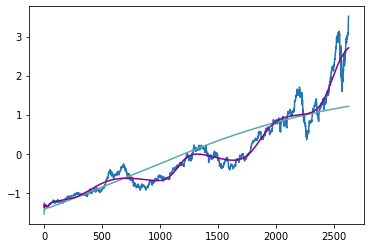

In [19]:
plt.plot(date_idx, adj_close_price)
plt.plot(date_idx, pricePredict, c='#5aa9ab')
plt.plot(date_idx, pricePredict2, c='#8B008B')
plt.show()

In [20]:
pricePredict3 = mlpr2.predict(date_idx[-holdDays:])
print((pricePredict3-date_idx[-holdDays:])/date_idx[-holdDays:]*100)

[[-99.89699759]
 [-99.89692712]
 [-99.89685796]
 [-99.89679009]
 [-99.89672359]]
